In [1]:
import pandas as pd

df = pd.read_csv('age_education.csv')

In [2]:
df.head()

,age,education
0,27.007219,college
1,47.615409,highschool
2,51.382815,highschool
3,54.906622,highschool
4,27.719939,less_than_highschool


In [3]:
df['z_age'] = (df['age'] - df['age'].mean())/df['age'].std()

In [4]:
from kmodes.kprototypes import KPrototypes

X = df[['z_age', 'education']].values
kp = KPrototypes(n_clusters=3)
df['cluster'] = kp.fit_predict(X, categorical=[1])

In [5]:
df = pd.concat([df,pd.get_dummies(df['education'])],axis=1)

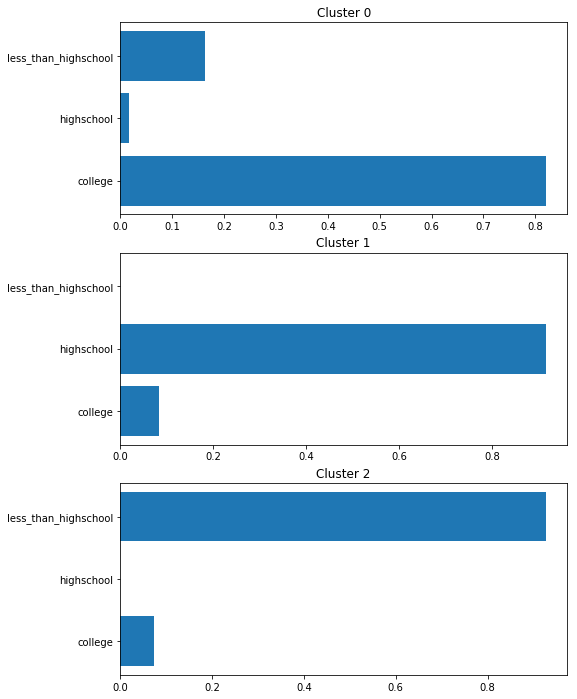

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,12))

for i in range(3):
    cluster_df = df[df['cluster'] == i]
    means = cluster_df[['college','highschool','less_than_highschool']].mean()

    ax = plt.subplot(3, 1, i+1)
    plt.barh([1,2,3],means)
    ax.set_yticks([1,2,3])
    ax.set_yticklabels(['college','highschool','less_than_highschool'])
    ax.set_title('Cluster ' + str(i))
plt.show()